In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
X = pd.read_csv(r'/content/iris.csv')
X.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [3]:
X.describe()

,sepal length,sepal width,petal length,petal width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,2.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


In [4]:
species =X.species
species=species.tolist()

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [6]:
X_corr = (1 / 150) * X.T.dot(X)

In [7]:
u,s,v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s, u
eig_values, eig_vectors

(array([3.8370179 , 0.91413636, 0.18622615, 0.04208608, 0.02053351]),
 array([[-0.44486332, -0.38197963,  0.75062477, -0.14120121, -0.26983859],
        [ 0.23336907, -0.92097203, -0.28724936, -0.00351339,  0.12175736],
        [-0.50604293, -0.02871731,  0.02833749,  0.24305798,  0.82656861],
        [-0.49689383, -0.07063728, -0.38544602,  0.61258273, -0.47358279],
        [-0.49462368,  0.00936826, -0.45241421, -0.73872531, -0.06975636]]))

In [8]:
np.linalg.eig(X_corr)

(array([3.8370179 , 0.91413636, 0.18622615, 0.02053351, 0.04208608]),
 array([[-0.44486332,  0.38197963,  0.75062477,  0.26983859,  0.14120121],
        [ 0.23336907,  0.92097203, -0.28724936, -0.12175736,  0.00351339],
        [-0.50604293,  0.02871731,  0.02833749, -0.82656861, -0.24305798],
        [-0.49689383,  0.07063728, -0.38544602,  0.47358279, -0.61258273],
        [-0.49462368, -0.00936826, -0.45241421,  0.06975636,  0.73872531]]))

variance of each feature--> [76.74035809 18.28272721  3.7245229   0.84172153  0.41067028]


Text(0.5, 0, 'Dimensions')

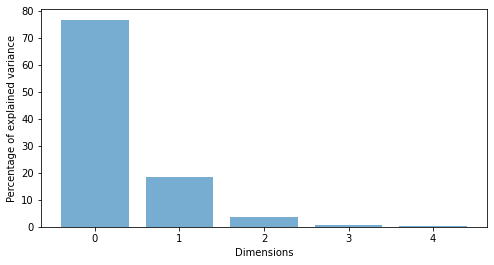

In [9]:
total = sum(eig_values)
variance_of_each_feature =(eig_values / np.sum(eig_values))*100
print("variance of each feature-->",variance_of_each_feature)
plt.figure(figsize=(8,4))
plt.bar(range(5),variance_of_each_feature, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

In [10]:
pc1 = X.dot(eig_vectors[:,0])
pc2 = X.dot(eig_vectors[:,1])

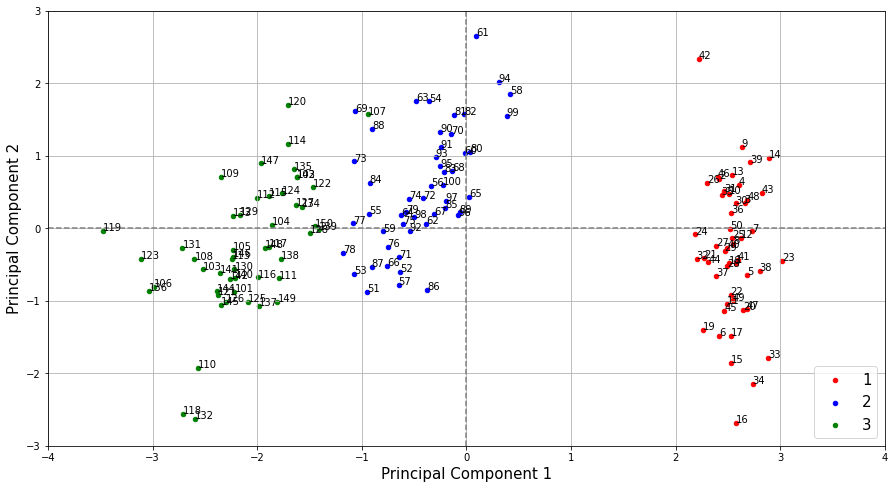

In [11]:
def plot_scatter(pc1, pc2):
    fig, ax = plt.subplots(figsize=(15, 8))
    
    species_unique = list(set(species))
    species_colors = ["r","b","g"]
    
    for i, spec in enumerate(species):
        plt.scatter(pc1[i], pc2[i], label = spec, s = 20, c=species_colors[species_unique.index(spec)])
        ax.annotate(str(i+1), (pc1[i],pc2[i]))
    
    from collections import OrderedDict
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4)
    
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")
    
    plt.grid()
    plt.axis([-4, 4, -3, 3])
    plt.show()
    
plot_scatter(pc1, pc2)